In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
import pandas

In [4]:
df = pandas.read_csv('https://data.urbansharing.com/oslobysykkel.no/trips/v1/2020/06.csv',
                     parse_dates=[0, 1])

In [5]:
df

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-06-01 03:04:37.306000+00:00,2020-06-01 03:09:22.739000+00:00,285,503,Fagerheimgata,ved Dælenenga busstopp,59.927606,10.765985,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203
1,2020-06-01 03:07:07.686000+00:00,2020-06-01 03:11:57.290000+00:00,289,495,Vaterlandsparken,langs Brugata,59.913516,10.757335,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330
2,2020-06-01 03:14:18.341000+00:00,2020-06-01 03:22:01.725000+00:00,463,382,Stensgata,ved trikkestoppet,59.929586,10.732839,450,Elisenberg,ved holdeplassen,59.919524,10.708840
3,2020-06-01 03:16:08.189000+00:00,2020-06-01 03:20:07.867000+00:00,239,427,Briskeby,ved Uranienborg skole,59.920218,10.717978,387,Studenterlunden,langs Karl Johan,59.914586,10.735453
4,2020-06-01 03:19:52+00:00,2020-06-01 03:22:29.035000+00:00,157,429,Thune,ved bomringen,59.922080,10.685880,484,Karenlyst allé,ved Skabos vei,59.920330,10.683814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289601,2020-06-29 22:56:09.974000+00:00,2020-06-29 23:03:55.070000+00:00,465,530,Holbergs Plass,ved Welhavens gate,59.919309,10.734305,579,Bogstadveien,ved Sporveisgata,59.924732,10.724628
289602,2020-06-29 22:56:43.502000+00:00,2020-06-29 23:23:57.035000+00:00,1633,737,Munkegata trikkestopp,langs Oslo gate,59.908255,10.767800,617,Bjerregaardsgate Øst,ved Uelands gate,59.927168,10.749755
289603,2020-06-29 22:56:55.981000+00:00,2020-06-29 23:22:38.367000+00:00,1542,737,Munkegata trikkestopp,langs Oslo gate,59.908255,10.767800,617,Bjerregaardsgate Øst,ved Uelands gate,59.927168,10.749755
289604,2020-06-29 22:57:35.805000+00:00,2020-06-29 23:05:50.069000+00:00,494,534,Filipstadveien,langs busslommen,59.910228,10.720879,588,Meltzers gate,langs Skovveien,59.918014,10.718435


In [6]:
sdf = spark.createDataFrame(df)

In [7]:
sdf.show()

+--------------------+--------------------+--------+----------------+--------------------+-------------------------+----------------------+-----------------------+--------------+--------------------+-----------------------+--------------------+---------------------+
|          started_at|            ended_at|duration|start_station_id|  start_station_name|start_station_description|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_description|end_station_latitude|end_station_longitude|
+--------------------+--------------------+--------+----------------+--------------------+-------------------------+----------------------+-----------------------+--------------+--------------------+-----------------------+--------------------+---------------------+
|2020-06-01 05:04:...|2020-06-01 05:09:...|     285|             503|       Fagerheimgata|     ved Dælenenga bus...|     59.92760586837719|      10.76598469881135|           421|Alexander Kiellan...|

In [8]:
sdf.printSchema()

root
 |-- started_at: timestamp (nullable = true)
 |-- ended_at: timestamp (nullable = true)
 |-- duration: long (nullable = true)
 |-- start_station_id: long (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_description: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: long (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_description: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)



In [9]:
sdf.select('started_at', 'ended_at').show(5)

+--------------------+--------------------+
|          started_at|            ended_at|
+--------------------+--------------------+
|2020-06-01 05:04:...|2020-06-01 05:09:...|
|2020-06-01 05:07:...|2020-06-01 05:11:...|
|2020-06-01 05:14:...|2020-06-01 05:22:...|
|2020-06-01 05:16:...|2020-06-01 05:20:...|
| 2020-06-01 05:19:52|2020-06-01 05:22:...|
+--------------------+--------------------+
only showing top 5 rows



In [12]:
sdf.select((sdf['duration'] + 5).alias('longer duration')).show()

+---------------+
|longer duration|
+---------------+
|            290|
|            294|
|            468|
|            244|
|            162|
|           1126|
|            604|
|            329|
|            228|
|            766|
|            114|
|            317|
|           1272|
|            529|
|            358|
|            684|
|           2993|
|            370|
|            535|
|            744|
+---------------+
only showing top 20 rows



In [13]:
sdf.select(sdf['ended_at'] - sdf['started_at']).show(5)

+-----------------------+
|(ended_at - started_at)|
+-----------------------+
|   4 minutes 45.433 ...|
|   4 minutes 49.604 ...|
|   7 minutes 43.384 ...|
|   3 minutes 59.678 ...|
|   2 minutes 37.035 ...|
+-----------------------+
only showing top 5 rows



In [14]:
sdf.select(sdf['ended_at'] - sdf['started_at']).printSchema()

root
 |-- (ended_at - started_at): interval (nullable = true)



In [17]:
sdf.select(sdf['ended_at'] - sdf['started_at']).take(5)

ValueError: Could not parse datatype: interval

<AxesSubplot:ylabel='Frequency'>

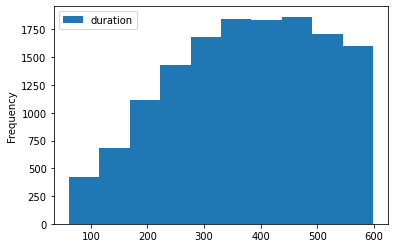

In [23]:
sdf[sdf['duration'] < 600].sample(0.1).select('duration').toPandas().plot.hist()

In [24]:
import pyspark.sql.functions as func

In [39]:
cluster_data = (sdf
 .withColumn('hour', func.hour(sdf['started_at']))
 .groupBy(sdf['started_at'].cast('date').alias('date'))
 .pivot('hour')
 .count())

/Users/dirkhesse/.venv/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

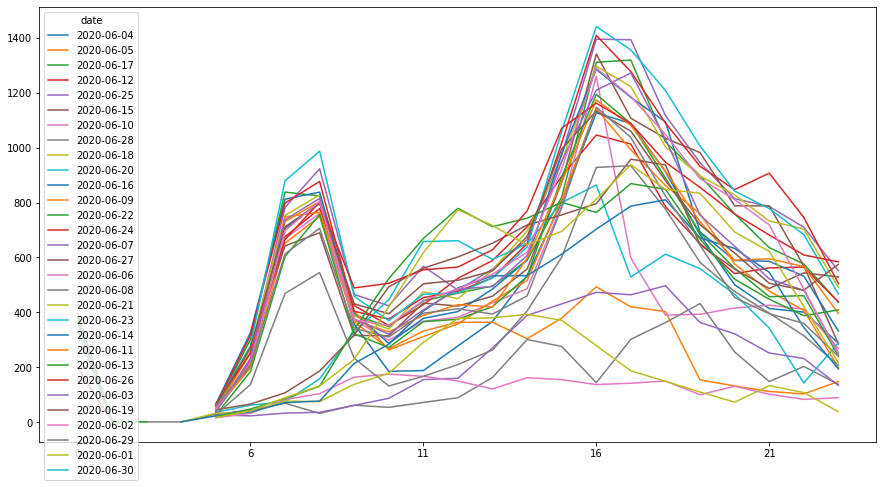

In [34]:
cluster_data.toPandas().set_index('date').T.plot(figsize=(15, 8))

In [35]:
cluster_data.show(5)

+----------+---+----+----+----+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+
|      date|  0|   1|   2|   3|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15|  16|  17|  18| 19| 20| 21| 22| 23|
+----------+---+----+----+----+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+
|2020-06-04|100|null|null|null| 42|205|705|803|357|185|188|278|367|533|801|1127|1088| 913|682|501|414|401|288|
|2020-06-05|129|null|null|null| 49|198|652|749|366|267|332|364|364|304|379| 493| 420| 403|154|132|112|103|148|
|2020-06-17|151|null|null|null| 57|301|838|824|391|348|442|470|496|590|820|1311|1319|1021|897|759|636|576|437|
|2020-06-12|216|null|null|null| 42|224|675|778|425|352|428|524|589|712|896|1046|1013| 785|651|541|562|565|438|
|2020-06-25|254|null|null|null| 48|254|782|923|465|424|568|481|558|665|973|1395|1393|1117|945|814|786|710|552|
+----------+---+----+----+----+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+
o

In [37]:
cluster_data.na.fill(0).show(5)

+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+
|      date|  0|  1|  2|  3|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15|  16|  17|  18| 19| 20| 21| 22| 23|
+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+
|2020-06-04|100|  0|  0|  0| 42|205|705|803|357|185|188|278|367|533|801|1127|1088| 913|682|501|414|401|288|
|2020-06-05|129|  0|  0|  0| 49|198|652|749|366|267|332|364|364|304|379| 493| 420| 403|154|132|112|103|148|
|2020-06-17|151|  0|  0|  0| 57|301|838|824|391|348|442|470|496|590|820|1311|1319|1021|897|759|636|576|437|
|2020-06-12|216|  0|  0|  0| 42|224|675|778|425|352|428|524|589|712|896|1046|1013| 785|651|541|562|565|438|
|2020-06-25|254|  0|  0|  0| 48|254|782|923|465|424|568|481|558|665|973|1395|1393|1117|945|814|786|710|552|
+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+
only showing top 5 rows



In [40]:
cluster_data = cluster_data.na.fill(0)

In [36]:
from pyspark.ml.feature import VectorAssembler

In [69]:
vector_assembler = VectorAssembler(inputCols=[str(i) for i in range(24) if i not in [1,2,3,4]],
                                   outputCol="features")

In [70]:
vector_assembler.transform(cluster_data).show(5)

+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+--------------------+
|      date|  0|  1|  2|  3|  5|  6|  7|  8|  9| 10| 11| 12| 13| 14| 15|  16|  17|  18| 19| 20| 21| 22| 23|            features|
+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+---+---+---+---+---+--------------------+
|2020-06-04|100|  0|  0|  0| 42|205|705|803|357|185|188|278|367|533|801|1127|1088| 913|682|501|414|401|288|[100.0,42.0,205.0...|
|2020-06-05|129|  0|  0|  0| 49|198|652|749|366|267|332|364|364|304|379| 493| 420| 403|154|132|112|103|148|[129.0,49.0,198.0...|
|2020-06-17|151|  0|  0|  0| 57|301|838|824|391|348|442|470|496|590|820|1311|1319|1021|897|759|636|576|437|[151.0,57.0,301.0...|
|2020-06-12|216|  0|  0|  0| 42|224|675|778|425|352|428|524|589|712|896|1046|1013| 785|651|541|562|565|438|[216.0,42.0,224.0...|
|2020-06-25|254|  0|  0|  0| 48|254|782|923|465|424|568|481|558|665|973|1395|1393|1117|945|814|78

In [45]:
from pyspark.ml.clustering import KMeans

In [71]:
ks = list(range(2, 8))

In [72]:
training_data = vector_assembler.transform(cluster_data)

In [73]:
models = [KMeans(k=k).fit(training_data) for k in ks]

In [74]:
m = models[0]

In [75]:
m.summary.clusterSizes

[6, 24]

In [76]:
import matplotlib.pyplot as plt

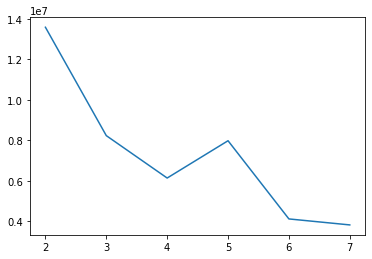

In [77]:
plt.plot(ks, [m.summary.trainingCost for m in models])

<AxesSubplot:>

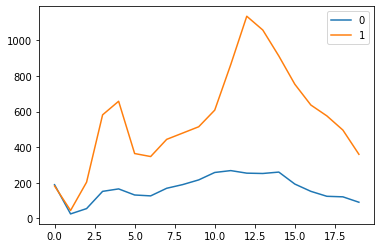

In [78]:
pandas.DataFrame(models[0].clusterCenters()).T.plot.line()

<AxesSubplot:>

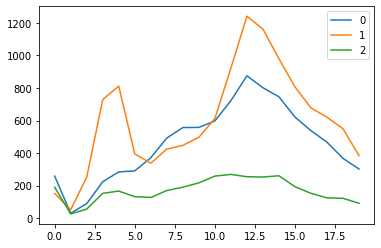

In [79]:
pandas.DataFrame(models[1].clusterCenters()).T.plot.line()

<AxesSubplot:xlabel='cluster'>

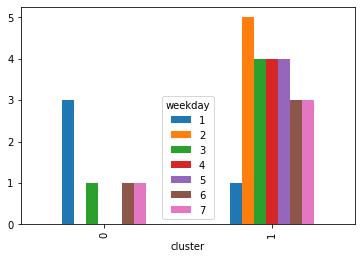

In [81]:
df_pred = models[0].transform(training_data)
pred = df_pred.select(func.dayofweek('date').alias('weekday'),
                      df_pred['prediction'].alias('cluster')).groupBy('cluster', 'weekday').count()
pred.toPandas().pivot(index='cluster', columns='weekday', values='count').plot.bar()

<AxesSubplot:xlabel='cluster'>

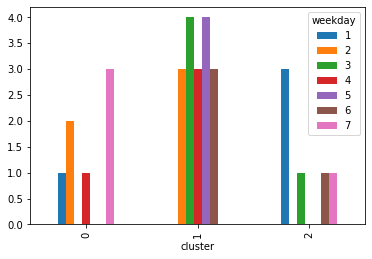

In [82]:
df_pred = models[1].transform(training_data)
pred = df_pred.select(func.dayofweek('date').alias('weekday'),
                      df_pred['prediction'].alias('cluster')).groupBy('cluster', 'weekday').count()
pred.toPandas().pivot(index='cluster', columns='weekday', values='count').plot.bar()

# ALS

Represent a matrix M with two lower rank matrices $U$ and $V$.

$$M = UV$$

In [83]:
sdf.printSchema()

root
 |-- started_at: timestamp (nullable = true)
 |-- ended_at: timestamp (nullable = true)
 |-- duration: long (nullable = true)
 |-- start_station_id: long (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_description: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: long (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_description: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)



In [84]:
trips = sdf.groupBy('start_station_id', 'end_station_id').count()

In [85]:
trips.show(5)

+----------------+--------------+-----+
|start_station_id|end_station_id|count|
+----------------+--------------+-----+
|             382|           450|    3|
|             480|           464|  104|
|             390|           494|  197|
|             590|           548|   16|
|             425|           575|    4|
+----------------+--------------+-----+
only showing top 5 rows



<AxesSubplot:ylabel='Frequency'>

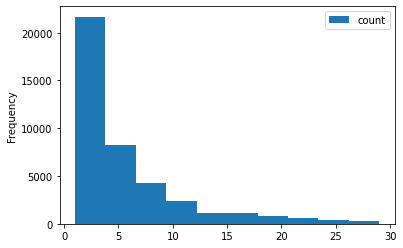

In [87]:
trips[trips['count']< 30].select('count').toPandas().plot.hist()

In [88]:
train, test = trips.randomSplit([0.8, 0.2])

In [89]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [97]:
als = ALS(maxIter=8, regParam=0.01,
          userCol='start_station_id',
          itemCol='end_station_id',
          ratingCol='count',
          coldStartStrategy="drop")

In [98]:
model = als.fit(train)

In [99]:
predictions = model.transform(test)

In [100]:
predictions.show(5)

+----------------+--------------+-----+----------+
|start_station_id|end_station_id|count|prediction|
+----------------+--------------+-----+----------+
|             530|           471|    4| 1.9921961|
|             548|           471|    2| 1.9461486|
|             444|           471|    2| 3.1283245|
|             386|           471|   12|  2.712727|
|             734|           471|    1| 1.6496465|
+----------------+--------------+-----+----------+
only showing top 5 rows



In [101]:
evaluator = RegressionEvaluator(metricName='r2', labelCol='count', predictionCol='prediction')
rsq = evaluator.evaluate(predictions)

In [102]:
rsq

0.24054194106556537

In [103]:
top_stations = sdf.groupBy('start_station_id', 'start_station_name').count().sort(func.desc('count')).limit(10)

In [104]:
top_stations.show()

+----------------+--------------------+-----+
|start_station_id|  start_station_name|count|
+----------------+--------------------+-----+
|             464|         Sukkerbiten| 5294|
|             494|      Rådhusbrygge 4| 4875|
|             479|          Tjuvholmen| 4664|
|             551|     Olaf Ryes plass| 4008|
|             589|                 Huk| 3925|
|             421|Alexander Kiellan...| 3524|
|             398|        Ringnes Park| 3468|
|             489|            Torggata| 3261|
|             478|      Jernbanetorget| 3231|
|             446|     Bislett Stadion| 3227|
+----------------+--------------------+-----+



In [105]:
model.recommendForUserSubset(top_stations, 10).show()

+----------------+--------------------+
|start_station_id|     recommendations|
+----------------+--------------------+
|             479|[[534, 228.66742]...|
|             489|[[494, 110.28078]...|
|             398|[[489, 103.42326]...|
|             494|[[494, 155.21284]...|
|             446|[[479, 100.43775]...|
|             589|[[589, 234.99786]...|
|             464|[[443, 363.26166]...|
|             478|[[464, 224.2778],...|
|             421|[[489, 122.03354]...|
|             551|[[489, 208.37148]...|
+----------------+--------------------+



In [106]:
row = model.recommendForUserSubset(top_stations, 10).take(10)[0]

In [107]:
row

Row(start_station_id=479, recommendations=[Row(end_station_id=534, rating=228.66741943359375), Row(end_station_id=456, rating=201.6960906982422), Row(end_station_id=479, rating=164.5955352783203), Row(end_station_id=390, rating=140.59613037109375), Row(end_station_id=484, rating=122.93727111816406), Row(end_station_id=589, rating=122.24514770507812), Row(end_station_id=468, rating=108.60723114013672), Row(end_station_id=537, rating=89.30619812011719), Row(end_station_id=579, rating=73.96481323242188), Row(end_station_id=535, rating=71.4148178100586)])

In [110]:
rec_df = pandas.DataFrame(row.recommendations, columns=['start_station_id', 'count']).set_index('start_station_id')

In [111]:
rec_df

,count
start_station_id,
534,228.667419
456,201.696091
479,164.595535
390,140.596130
484,122.937271
589,122.245148
468,108.607231
537,89.306198
579,73.964813


In [114]:
sdf.printSchema()

root
 |-- started_at: timestamp (nullable = true)
 |-- ended_at: timestamp (nullable = true)
 |-- duration: long (nullable = true)
 |-- start_station_id: long (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_description: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: long (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_description: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)



In [116]:
long_lat = sdf.select('start_station_id', 'start_station_latitude', 'start_station_longitude').distinct().toPandas()

In [120]:
joined_df = long_lat.set_index('start_station_id').join(rec_df).dropna()

In [121]:
import geopandas

In [123]:
gdf = geopandas.GeoDataFrame(joined_df,
                            geometry=geopandas.points_from_xy(
                                joined_df['start_station_longitude'],
                                joined_df['start_station_latitude']
                            ), crs='epsg:4326')

In [126]:
import contextily as ctx

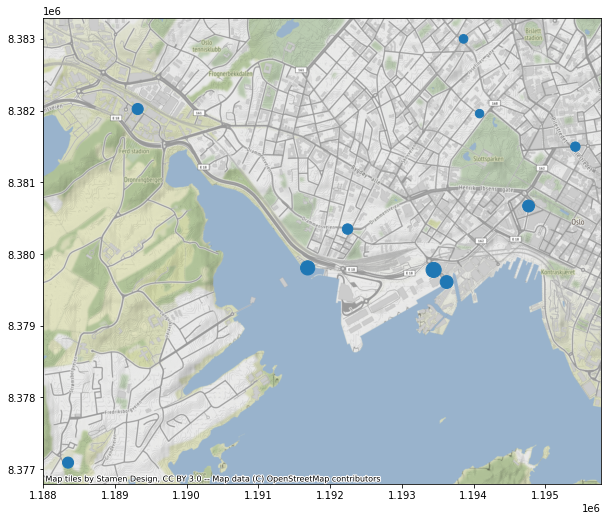

In [129]:
cdf = gdf.to_crs(epsg=3857)
ax = cdf.plot(figsize=(10, 10), markersize=cdf['count'])
ctx.add_basemap(ax)